
<center>

**آزمون عملی درس یادگیری ماشین - ارشد علوم کامپیوتر - دانشگاه الزهرا- خرداد ۱۴۰۴**

**X-Ray توسعه ی سیستم تشخیص بیماری پوکی استخوان زانو با استفاده از تصاویر**

[Knee Osteoarthritis Classification [224*224]](https://github.com/F-Aghaeipoor/Knee-X-ray)
</center>





<div dir="rtl" style="text-align: right;">


**چالش اصلی:** مجموعه داده آموزشی شما  شامل ۲۵۲۰+۱۲۶۰ تصویر برای بیماران مبتلا و سالم می باشد.
برخی تصاویر ممکن است نویز داشته باشند (مانند تغییرات در روشنایی یا کنتراست).
</div>


*   **Normal**: Images of knees with no signs of osteoporosis.

*   **AbNormal** (Osteopenia, Osteoporosis): Images showing early stages of bone density loss and Images indicating advanced bone density degradation.


<div dir="rtl" style="text-align: right;">

**هدف:**
طراحی و پیاده‌سازی  خطوط لوله یادگیری ماشین/عمیق که عملکرد طبقه‌بندی ( با معیار F1-score) را در مجموعه آزمایشی به حداکثر برساند، در حالی که محدودیت داده‌های نامتوازن را مدیریت می‌کند.
</div>


# Section A : Pre-processing

<div dir="rtl" style="text-align: right;">

**وظایف:**

۱) تحلیل مقدماتی داده‌ها

۲) پیش‌پردازش و افزایش داده :
یک خط لوله پیش‌پردازش برای **مدیریت نویز و تغییرات** در تصاویر اشعه ایکس (مانند نرمال‌سازی، حذف نویز) توصیف کنید. برای حداقل یک تکنیک پیش‌پردازش (مانند نرمال‌سازی یا فیلتر کردن) توجیه ریاضی ارائه دهید.

حداقل سه تکنیک **افزایش داده** مناسب برای تصاویر اشعه ایکس پیشنهاد دهید تا اندازه مؤثر مجموعه آموزشی افزایش یابد. توضیح دهید چرا هر تکنیک برای این وظیفه پزشکی مناسب است.

</div>


نرمال سازی پیکسل ها به [0,1]

x_norm=x-mean/Standard Deviation

تکنیک‌های افزایش داده (Data Augmentation) مناسب برای اشعه ایکس
توجه: تصاویر اشعه ایکس به دلیل حساسیت تشخیصی نباید به‌صورت شدید تغییر یابند.

۱. چرخش محدود (Small Rotation ±10°)
چرا مناسب است: ممکن است هنگام گرفتن عکس بیمار کمی جابه‌جا باشد. چرخش‌های کوچک باعث مقاوم‌تر شدن مدل نسبت به تغییر زاویه می‌شود.

۲. تغییر روشنایی و کنتراست (Brightness & Contrast Adjustment)
چرا مناسب است: دستگاه‌های مختلف تصویربرداری، روشنایی متفاوتی تولید می‌کنند.

۳. برش تصادفی و بازاندازه‌گیری (Random Resized Crop)
چرا مناسب است: مدل را به بخشی از تصویر حساس می‌کند و از Overfitting روی ویژگی‌های خاص جلوگیری می‌کند.

In [1]:
from google.colab import drive
# Mount Google Drive to access files stored there
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install unrar tool for extracting .rar files
!apt-get install -y unrar

import os
base_path = "/content/drive/MyDrive/X-ray"

# Extract train, val, and test .rar files
for split in ['train', 'val', 'test']:
    rar_path = os.path.join(base_path, f"{split}.rar")
    extract_path = os.path.join(base_path, split)
    os.makedirs(extract_path, exist_ok=True)
    !unrar x -o+ "{rar_path}" "{extract_path}/"

Streaming output truncated to the last 5000 lines.
Extracting  /content/drive/MyDrive/X-ray/train/train/AbNormal/OS9_aug_0.jpeg       8%  OK 
Extracting  /content/drive/MyDrive/X-ray/train/train/AbNormal/OS9_aug_1.jpeg       8%  OK 
Extracting  /content/drive/MyDrive/X-ray/train/train/AbNormal/OS9_aug_2.jpeg       8%  OK 
Extracting  /content/drive/MyDrive/X-ray/train/train/AbNormal/OS9_aug_3.jpeg       8%  OK 
Extracting  /content/drive/MyDrive/X-ray/train/train/AbNormal/OS9_aug_4.jpeg       8%  OK 
Extracting  /content/drive/MyDrive/X-ray/train/train/AbNormal/Osteopenia 1.jpg       8%  OK 
Extracting  /content/drive/MyDrive/X-ray/train/train/AbNormal/Osteopenia 10.jpg       8%  OK 
Extracting  /content/drive/MyDrive/X-ray/train/train/AbNormal/Osteopenia 100.jpg       8%  OK 
Extracting  /content/drive/MyDrive/X-ray/train/train/AbNormal/Osteopenia 100_aug_0.jpeg       8%  OK 
Extracting  /content/drive/My

In [3]:
# Define the path to image folders after extraction
train_path = os.path.join(base_path, 'train', 'train')
val_path = os.path.join(base_path, 'val', 'val')
test_path = os.path.join(base_path, 'test', 'test')

Sample images from training set:


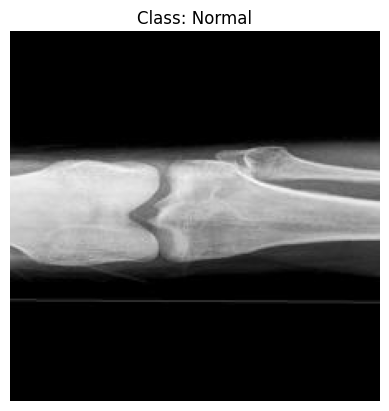

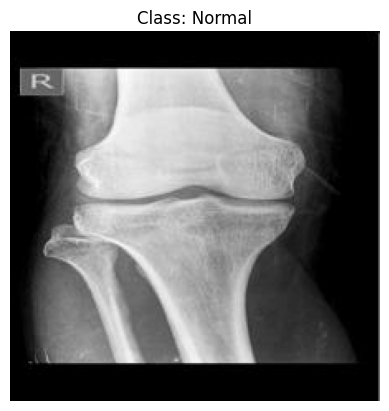

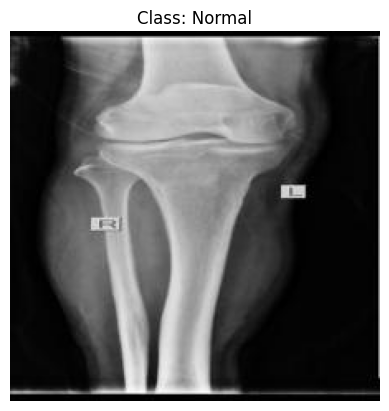

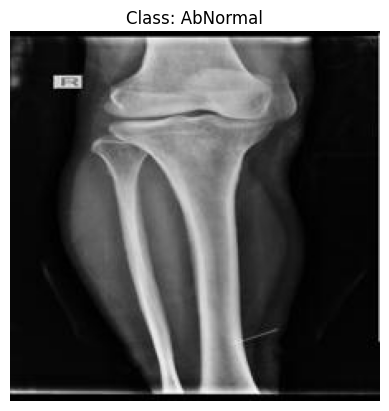

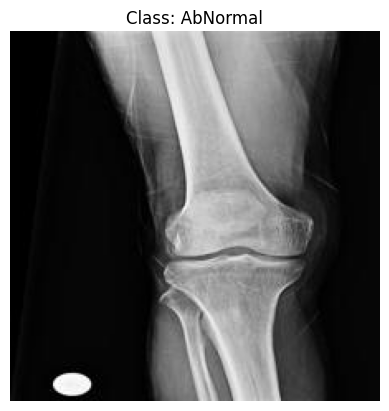

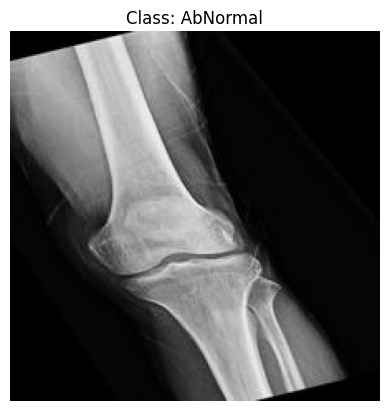

Class distribution in Training set: {'Normal': 1260, 'AbNormal': 2520}


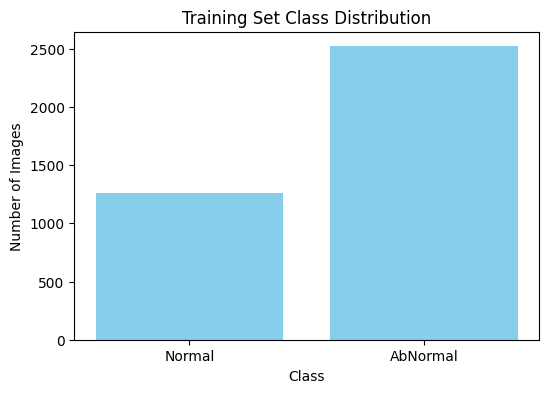

Class distribution in Validation set: {'Normal': 360, 'AbNormal': 720}


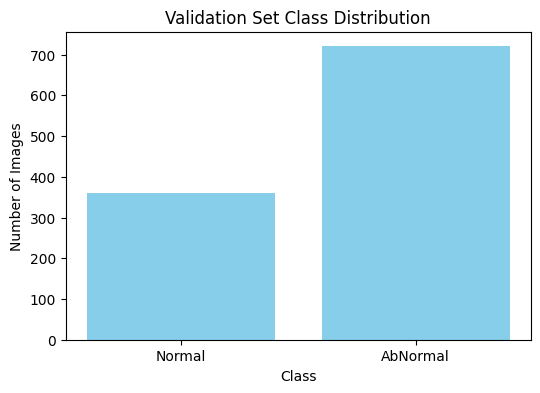

Class distribution in Test set: {'Normal': 180, 'AbNormal': 360}


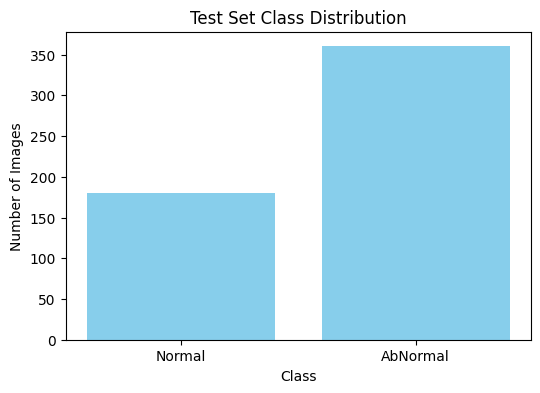

Checking image sizes in training set:
Unique image sizes in /content/drive/MyDrive/X-ray/train/train: {(224, 224)}


[(224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),

In [13]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def show_sample_images(folder, num_samples=3):
    classes = os.listdir(folder)
    for cls in classes:
        imgs = os.listdir(os.path.join(folder, cls))[:num_samples]
        for img in imgs:
            img_path = os.path.join(folder, cls, img)
            im = Image.open(img_path)
            plt.imshow(im, cmap='gray')
            plt.title(f"Class: {cls}")
            plt.axis('off')
            plt.show()

def class_distribution(folder):
    dist = {}
    for cls in os.listdir(folder):
        dist[cls] = len(os.listdir(os.path.join(folder, cls)))
    return dist

def plot_class_distribution(dist, title):
    classes = list(dist.keys())
    counts = list(dist.values())
    plt.figure(figsize=(6,4))
    plt.bar(classes, counts, color='skyblue')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.show()

def check_image_sizes(folder):
    sizes = []
    classes = os.listdir(folder)
    for cls in classes:
        imgs = os.listdir(os.path.join(folder, cls))
        for img in imgs:
            img_path = os.path.join(folder, cls, img)
            im = Image.open(img_path)
            sizes.append(im.size)  # (width, height)
    sizes_set = set(sizes)
    print(f"Unique image sizes in {folder}: {sizes_set}")
    return sizes

# Show sample images
print("Sample images from training set:")
show_sample_images(train_path)

# Print and plot class distributions
for split_path, split_name in zip([train_path, val_path, test_path], ['Training', 'Validation', 'Test']):
    dist = class_distribution(split_path)
    print(f"Class distribution in {split_name} set: {dist}")
    plot_class_distribution(dist, f'{split_name} Set Class Distribution')

# Check image sizes in training set
print("Checking image sizes in training set:")
check_image_sizes(train_path)

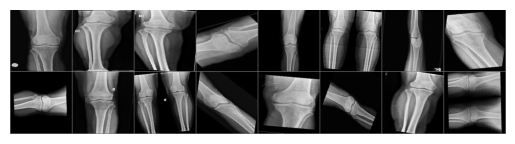

In [33]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch
import torchvision
import numpy as np

# Define data augmentation and normalization pipeline
transform_pipeline = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((224, 224)),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.25])
])
# Create training dataset and DataLoader
train_dataset = ImageFolder(root=train_path, transform=transform_pipeline)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# Helper to display batch of images
def imshow(img):
    img = img * 0.25 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.show()

images, labels = next(iter(train_loader))
imshow(torchvision.utils.make_grid(images))

# Section B : Models

<div dir="rtl" style="text-align: right;">

**وظایف:**

۱) با استفاده دو مدل از مدل های طبقه بندی یادگیری ماشین سنتی این مجموعه ی داده را آموزش دهید و خطا و دقت داده های تست را تخمین بزنید؟دلیل انتخاب این مدل ها را توضیح دهید.

۲) یک معماری مدل یادگیری عمیق مناسب برای این وظیفه پیشنهاد دهید و خطا و دقت مربوطه را بدست آورید.


 ۳) با توجه به اندازه ی داده ها، با استفاده از یادگیری انتقالی یک مدل از پیش آموزش دیده خاص (مانند ResNet، EfficientNet...)  را پیشنهاد دهید و بر روی داده موجود خطا و دقت مربوطه را بدست آورید.


  **نکته ۱:** با توجه به مجموعه  داده ها استراتژی های لازم (حداقل دو مورد ) برای جلوگیری از بیش برازش مدل استفاده نمایید و تاثیر آنها بر عملکرد مدل را ارزیابی نمایید.


 **نکته ۲:** الگوریتم بهینه‌سازی و هایپرپارامترهای مناسب (مانند نرخ یادگیری، اندازه دسته) باتوجه به زمینه ی مسیله پیشنهادی استفاده نمایید.
<div>

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
from PIL import Image
import os

# Feature extraction: flatten resized grayscale images
def extract_features_from_images(folder, image_size=(64, 64)):
    features = []
    labels = []
    for cls in os.listdir(folder):
        cls_path = os.path.join(folder, cls)
        for img_name in os.listdir(cls_path):
            try:
                img_path = os.path.join(cls_path, img_name)
                img = Image.open(img_path).convert('L')  # grayscale
                img = img.resize(image_size)
                img_np = np.array(img).flatten()  # convert to 1D vector
                features.append(img_np)
                labels.append(cls)
            except:
                continue
    return np.array(features), np.array(labels)

# Extract features
X_train, y_train = extract_features_from_images(train_path)
X_test, y_test = extract_features_from_images(test_path)

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Dimensionality reduction
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_pca, y_train_enc)

y_pred_log = logreg.predict(X_test_pca)

print("Logistic Regression:")
print(classification_report(y_test_enc, y_pred_log, target_names=le.classes_))

Logistic Regression:
              precision    recall  f1-score   support

    AbNormal       0.78      0.86      0.82       360
      Normal       0.65      0.51      0.57       180

    accuracy                           0.74       540
   macro avg       0.71      0.69      0.69       540
weighted avg       0.74      0.74      0.74       540



 ۱. (Logistic Regression)

🎯 دلیل انتخاب:
سادگی و تفسیرپذیری بالا: یکی از ساده‌ترین مدل‌های طبقه‌بندی خطی است که به‌راحتی می‌توان فهمید کدام ویژگی‌ها چقدر در تصمیم‌گیری مدل تأثیر دارند.

پایه‌ای برای مقایسه: به‌عنوان یک مدل پایه (baseline) استفاده می‌شود تا عملکرد سایر مدل‌های پیچیده‌تر مثل CNN یا Random Forest نسبت به آن سنجیده شود.

کارایی بالا در داده‌های با بعد پایین: وقتی ویژگی‌ها محدود و ساختار تصویر تخت (flattened) شده باشد، لاجستیک رگرشن معمولاً نتایج خوبی ارائه می‌دهد.

In [17]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_pca, y_train_enc)

y_pred_rf = rf.predict(X_test_pca)

print("Random Forest:")
print(classification_report(y_test_enc, y_pred_rf, target_names=le.classes_))

Random Forest:
              precision    recall  f1-score   support

    AbNormal       0.83      0.95      0.89       360
      Normal       0.86      0.62      0.72       180

    accuracy                           0.84       540
   macro avg       0.85      0.78      0.80       540
weighted avg       0.84      0.84      0.83       540



۲. (Random Forest)
🎯 دلیل انتخاب:

مدل غیرخطی با توانایی بالا در شناسایی الگوهای پیچیده: برخلاف لاجستیک که خطی است، Random Forest می‌تواند تصمیم‌های پیچیده‌تر و غیرخطی بگیرد.

مقاومت بالا در برابر نویز: به‌دلیل ساختار مجموعه‌ای از درختان (bagging)، نسبت به داده‌های noisy و ویژگی‌های نامرتبط مقاوم است.

مدیریت عدم‌توازن کلاس‌ها: امکان وزن‌دهی کلاس‌ها و استفاده از class_weight='balanced' برای مقابله با عدم‌توازن داده‌ها دارد.

عدم نیاز به نرمال‌سازی: برخلاف بسیاری از مدل‌ها، RF نسبت به مقیاس داده‌ها حساس نیست.



In [34]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transforms for validation and test sets (no data augmentation here)
from torchvision import transforms

transform= transforms.Compose([
    transforms.Lambda(lambda x: x.convert("RGB")),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


# Create datasets for train and validation and test sets using ImageFolder
train_dataset = ImageFolder(root=train_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = ImageFolder(root=val_path, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

test_dataset = ImageFolder(root=test_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define a simple CNN model
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(32 * 56 * 56, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


# Instantiate the model, loss function and optimizer
model = BasicCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Early stopping class to prevent overfitting
class EarlyStopping:
    def __init__(self, patience=3):
        self.patience = patience
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

early_stopping = EarlyStopping(patience=3)
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Iterate over training data
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total

    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break

# Test phase
model.eval()
test_loss = 0.0
test_correct = 0
test_total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (preds == labels).sum().item()
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss /= len(test_loader)
test_acc = 100 * test_correct / test_total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

# Detailed classification report for test results
print("Test Classification Report:")
print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))


Epoch 1/10, Train Loss: 0.6908, Train Acc: 73.52%, Val Loss: 0.4835, Val Acc: 78.80%
Epoch 2/10, Train Loss: 0.4105, Train Acc: 81.67%, Val Loss: 0.4615, Val Acc: 78.98%
Epoch 3/10, Train Loss: 0.2955, Train Acc: 87.46%, Val Loss: 0.4900, Val Acc: 76.48%
Epoch 4/10, Train Loss: 0.2278, Train Acc: 90.48%, Val Loss: 0.4745, Val Acc: 81.02%
Epoch 5/10, Train Loss: 0.1545, Train Acc: 93.44%, Val Loss: 0.5137, Val Acc: 82.50%
Early stopping triggered.
Test Loss: 0.4396, Test Accuracy: 84.63%
Test Classification Report:
              precision    recall  f1-score   support

    AbNormal       0.85      0.93      0.89       360
      Normal       0.83      0.67      0.74       180

    accuracy                           0.85       540
   macro avg       0.84      0.80      0.82       540
weighted avg       0.85      0.85      0.84       540



In [36]:
import torch
import torch.nn as nn
import torchvision.models as models

# EarlyStopping class (reuse if defined)
class EarlyStopping:
    def __init__(self, patience=3):
        self.patience = patience
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# ResNet18 with dropout in FC layers
class ResNet18_Dropout(nn.Module):
    def __init__(self, dropout_prob=0.5, num_classes=2):
        super(ResNet18_Dropout, self).__init__()
        self.model = models.resnet18(pretrained=True)
        num_features = self.model.fc.in_features
        self.model.fc = nn.Sequential(
            nn.Dropout(dropout_prob),
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ResNet18_Dropout(dropout_prob=0.5, num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 10
early_stopping = EarlyStopping(patience=4)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total

    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break


# Test phase with loss and accuracy
model.eval()
test_loss = 0.0
test_correct = 0
test_total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (preds == labels).sum().item()
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss /= len(test_loader)
test_acc = 100 * test_correct / test_total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

from sklearn.metrics import classification_report
print("ResNet18 with Dropout - Classification Report:")
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))


Epoch 1/10, Train Loss: 0.5063, Train Acc: 76.24%, Val Loss: 0.5264, Val Acc: 74.72%
Epoch 2/10, Train Loss: 0.3944, Train Acc: 83.10%, Val Loss: 0.3875, Val Acc: 83.89%
Epoch 3/10, Train Loss: 0.2991, Train Acc: 87.65%, Val Loss: 0.4872, Val Acc: 79.72%
Epoch 4/10, Train Loss: 0.2383, Train Acc: 90.42%, Val Loss: 0.4041, Val Acc: 84.81%
Epoch 5/10, Train Loss: 0.2093, Train Acc: 91.88%, Val Loss: 0.4765, Val Acc: 79.91%
Epoch 6/10, Train Loss: 0.1653, Train Acc: 93.68%, Val Loss: 0.4751, Val Acc: 85.93%
Early stopping triggered.
Test Loss: 0.3269, Test Accuracy: 88.70%
ResNet18 with Dropout - Classification Report:
              precision    recall  f1-score   support

    AbNormal       0.88      0.96      0.92       360
      Normal       0.91      0.73      0.81       180

    accuracy                           0.89       540
   macro avg       0.89      0.85      0.87       540
weighted avg       0.89      0.89      0.88       540



# Section C: Evaluations

<div dir="rtl" style="text-align: right;">

**وظایف:**

نتایج تمامی مدل ها را لیست کرده و ارزیابی از کارایی آنها داشته باشید.

چرا معیار F1-score برای این وظیفه، به‌ویژه با توجه به عدم تعادل احتمالی کلاس‌ها، مناسب است.
چگونه می‌توانیم اطمینان حاصل کنیم که مدل ما در تشخیص پزشکی عادلانه و قابل اعتماد است؟


</div>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import pandas as pd

# Evaluation helper
def evaluate_torch_model(model, data_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate evaluation metrics
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return precision, recall, accuracy, f1

basic_cnn_model = BasicCNN().to(device)
basic_cnn_model.eval()
# Evaluate all models
cnn_precision, cnn_recall, cnn_accuracy, cnn_f1 = evaluate_torch_model(basic_cnn_model, test_loader, device)
resnet_precision, resnet_recall, resnet_accuracy, resnet_f1= evaluate_torch_model(model, test_loader, device)

# Evaluate Logistic Regression model
logreg_precision = precision_score(y_test_enc, y_pred_log, average='weighted')
logreg_recall = recall_score(y_test_enc, y_pred_log, average='weighted')
logreg_accuracy = accuracy_score(y_test_enc, y_pred_log)
logreg_f1 = f1_score(y_test_enc, y_pred_log, average='weighted')

# Evaluate Random Forest model
rf_precision = precision_score(y_test_enc, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test_enc, y_pred_rf, average='weighted')
rf_accuracy = accuracy_score(y_test_enc, y_pred_rf)
rf_f1 = f1_score(y_test_enc, y_pred_rf, average='weighted')

# Create a summary DataFrame to compare all models
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Basic CNN", "ResNet18 Transfer Learning"],
    "Precision": [logreg_precision, rf_precision, cnn_precision, resnet_precision],
    "Recall": [logreg_recall, rf_recall, cnn_recall, resnet_recall],
    "Accuracy": [logreg_accuracy, rf_accuracy, cnn_accuracy, resnet_accuracy],
    "F1-Score": [logreg_f1, rf_f1, cnn_f1, resnet_f1]
})

print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                        Model  Precision    Recall  Accuracy  F1-Score
0         Logistic Regression   0.735225  0.744444  0.744444  0.735771
1               Random Forest   0.841566  0.838889  0.838889  0.830922
2                   Basic CNN   0.111111  0.333333  0.333333  0.166667
3  ResNet18 Transfer Learning   0.889102  0.887037  0.887037  0.883573


اهمیت معیار F1-Score در این مسئله
مسئله شما یک طبقه‌بندی پزشکی است که در آن:

تعداد نمونه‌ها بین دو کلاس (Normal و Abnormal) نامتوازن است.

دقت (Accuracy) ممکن است گمراه‌کننده باشد چون اگر مدل فقط کلاس غالب را پیش‌بینی کند، دقت بالایی دارد ولی عملکرد ضعیفی در تشخیص بیماران دارد.

F1-Score تعادلی بین Precision (درصد پیش‌بینی‌های درست مثبت) و Recall (درصد نمونه‌های مثبت واقعی که درست شناسایی شده‌اند) است.

بنابراین:

F1-score معیار بهتری برای ارزیابی عملکرد مدل است که به هر دو نوع خطا (False Positive و False Negative) توجه می‌کند.

کمک می‌کند مدل ما عادلانه‌تر و قابل اعتمادتر باشد، خصوصاً در کاربردهای پزشکی که خطاهای تشخیصی می‌تواند پیامدهای جدی داشته باشد.

چگونه اطمینان حاصل کنیم که مدل در تشخیص پزشکی عادلانه و قابل اعتماد است؟
ارزیابی مدل روی داده‌های جداگانه و نامتوازن و گزارش معیارهایی مثل Precision، Recall و F1-score.

استفاده از Cross-validation برای اطمینان از پایداری مدل.

تحلیل Confusion Matrix برای بررسی اشتباهات مدل.

بررسی تاثیر استراتژی‌های جلوگیری از بیش‌برازش.

در نهایت، انجام آزمون‌های تخصصی توسط کارشناسان پزشکی.



